In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

import os
from share.helper_functions import(
    download_if_not_modified_today
)
from share.rogalski_functions import(
    data_voi_df
)
import pandas as pd
from sorcery import dict_of
from share.helper_functions import (
    plot
)
import datetime
import numpy as np
from share.basiw_functions import(
    get_popwoj_df
)

In [2]:
data_dir = './Rogalski_data'
data_file = 'wojewodztwa.csv'
path = os.sep.join([data_dir,data_file])
download_command='./get_voi.sh'

download_if_not_modified_today(path, download_command)
df = pd.read_csv(path)

./Rogalski_data/wojewodztwa.csv exists
./Rogalski_data/wojewodztwa.csv was modified today, not downloading


In [3]:
dfc = data_voi_df(df, 'cases')
dfc

,Dolnośląskie,Kujawsko-Pomorskie,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-18,1879,776,1274,205,1191,2000,3610,394,1204,376,1063,2193,461,741,1392,752
2022-01-19,2458,986,1362,354,1360,3471,5594,623,1789,518,2341,4647,585,1034,2195,1091
2022-01-20,2789,1161,1543,454,1773,3653,5863,753,1913,596,2145,4971,642,973,2396,1050
2022-01-21,3203,1158,1697,514,1765,4207,6227,699,2403,585,2251,5923,715,1138,2587,1410


In [4]:
urlMZ = "../MZ/MZ_data/akutalne_dane_wojewodztwa.csv"

dfMZ=pd.read_csv(urlMZ, encoding = 'cp1250', sep = ';',low_memory=False)
df_last=dfMZ['liczba_przypadkow'].loc[1:].T
list_last = df_last.tolist()
df_last = pd.DataFrame([list_last], columns = dfc.columns)
df_last.set_index([[pd.to_datetime(datetime.date(2022,1,23))]],inplace=True)
# df_last.set_index([[datetime.date(2022,1,23)]],inplace=True)

dfc = dfc.append(df_last)
dfc

,Dolnośląskie,Kujawsko-Pomorskie,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,2458,986,1362,354,1360,3471,5594,623,1789,518,2341,4647,585,1034,2195,1091
2022-01-20,2789,1161,1543,454,1773,3653,5863,753,1913,596,2145,4971,642,973,2396,1050
2022-01-21,3203,1158,1697,514,1765,4207,6227,699,2403,585,2251,5923,715,1138,2587,1410
2022-01-22,3644,1404,1800,495,2387,4001,7120,1000,2329,818,2857,6442,688,1169,3152,1367


In [5]:
dfd = data_voi_df(df, 'deaths')
dfd

,Dolnośląskie,Kujawsko-Pomorskie,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-18,28,17,14,10,36,43,46,10,9,4,21,59,18,10,40,12
2022-01-19,9,20,10,2,41,13,34,24,9,10,30,47,31,19,48,28
2022-01-20,17,22,16,10,36,26,34,12,27,5,19,28,16,12,28,7
2022-01-21,13,10,10,9,22,27,37,12,20,7,4,19,9,12,23,14


In [6]:
dfpopwoj  = get_popwoj_df()
dfpopwoj = dfpopwoj[['Ludność']]

# dfpopwoj

popwojdict = dfpopwoj.to_dict()['Ludność']
# popwojdict['Małopolskie']


dfc_per1e6 = pd.DataFrame()

for voi in dfc.columns:
    dfc_per1e6[voi] = 1e6*dfc[voi]/popwojdict[voi]

# dfc_per1e6

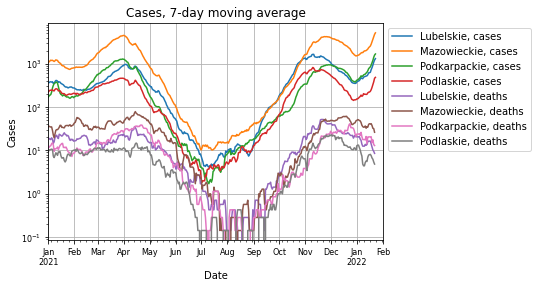

In [7]:
voivodships = ['Lubelskie', 'Mazowieckie', 'Podkarpackie', 'Podlaskie']

legendlabels_cases = [voi + ', cases' for voi in voivodships]
legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc[voivodships].rolling(7).mean()
dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[dfq, dfp],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date(2022,2,1)),
    legendlabels = legendlabels,
    logy = True
    )

plot(**plotopts);


,Dolnośląskie,Lubelskie,Małopolskie,Mazowieckie,Podkarpackie,Podlaskie
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-01-19,1505.000000,814.000000,2310.428571,3219.285714,1054.571429,285.428571
2022-01-20,1705.000000,927.571429,2474.142857,3641.285714,1193.428571,330.571429
2022-01-21,1955.142857,1083.571429,2759.714286,4129.142857,1405.571429,382.142857
2022-01-22,2280.000000,1216.571429,3004.142857,4752.142857,1578.000000,462.285714


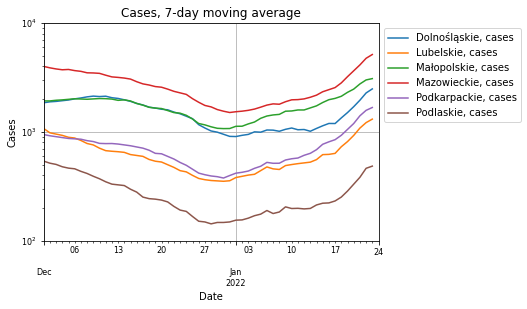

In [9]:
voivodships = [
    'Dolnośląskie',	# rośnie
    # 'Kujawsko-Pomorskie', # nie rośnie	
    'Lubelskie',	# rośnie
    # 'Lubuskie', 	# nie rośnie
    # 'Łódzkie', # nie rośnie
    'Małopolskie',	# rośnie
    'Mazowieckie',	# rośnie
    # 'Opolskie',	# nie rośnie
    'Podkarpackie',	# rośnie
    'Podlaskie',	# rośnie
    # 'Pomorskie', # rośnie mało
    # 'Śląskie',	#nie rośnie
    # 'Świętokrzyskie',	# rośnie mało
    # 'Warmińsko-Mazurskie',	# rośnie mało
    # 'Wielkopolskie',	# nie rośnie
    # 'Zachodniopomorskie' # rośnie mało
    ]

legendlabels_cases = [voi + ', cases' for voi in voivodships]
legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc[voivodships].rolling(7).mean()
# dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = True
    )

plot(**plotopts);

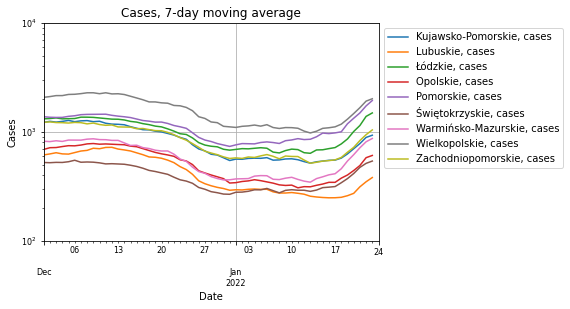

In [19]:
voivodships = [
    # 'Dolnośląskie',	# rośnie
    'Kujawsko-Pomorskie', # nie rośnie	
    # 'Lubelskie',	# rośnie
    'Lubuskie', 	# nie rośnie
    'Łódzkie', # nie rośnie
    # 'Małopolskie',	# rośnie
    # 'Mazowieckie',	# rośnie
    'Opolskie',	# nie rośnie
    # 'Podkarpackie',	# rośnie
    # 'Podlaskie',	# rośnie
    'Pomorskie', # rośnie mało
    # 'Śląskie',	#nie rośnie
    'Świętokrzyskie',	# rośnie mało
    'Warmińsko-Mazurskie',	# rośnie mało
    'Wielkopolskie',	# nie rośnie
    'Zachodniopomorskie' # rośnie mało
    ]

legendlabels_cases = [voi + ', cases' for voi in voivodships]
legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc[voivodships].rolling(7).mean()
dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = True
    )

plot(**plotopts);

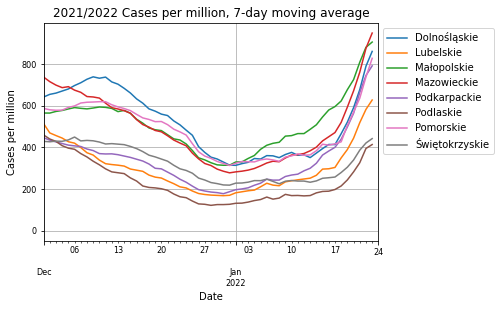

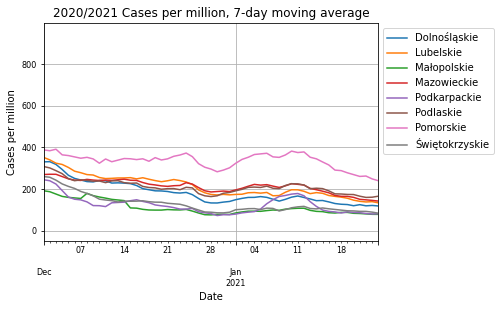

In [29]:
voivodships = [
    'Dolnośląskie',	# rośnie
    # 'Kujawsko-Pomorskie', # nie rośnie	
    'Lubelskie',	# rośnie
    # 'Lubuskie', 	# nie rośnie
    # 'Łódzkie', # nie rośnie
    'Małopolskie',	# rośnie
    'Mazowieckie',	# rośnie
    # 'Opolskie',	# nie rośnie
    'Podkarpackie',	# rośnie
    'Podlaskie',	# rośnie
    'Pomorskie', # rośnie mało
    # 'Śląskie',	#nie rośnie
    'Świętokrzyskie',	# rośnie mało
    # 'Warmińsko-Mazurskie',	# rośnie mało
    # 'Wielkopolskie',	# nie rośnie
    # 'Zachodniopomorskie' # rośnie mało
    ]

legendlabels_cases = voivodships
# legendlabels_cases = [voi + ', cases' for voi in voivodships]
# legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
# legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc_per1e6[voivodships].rolling(7).mean()
# dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2021/2022 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2020/2021 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2020,12,1), datetime.date(2021,1,24)),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

In [30]:
# voivodships = [
#     'Dolnośląskie',	# rośnie
#     # 'Kujawsko-Pomorskie', # nie rośnie	
#     # 'Lubelskie',	# rośnie
#     # 'Lubuskie', 	# nie rośnie
#     # 'Łódzkie', # nie rośnie
#     # 'Małopolskie',	# rośnie
#     # 'Mazowieckie',	# rośnie
#     # 'Opolskie',	# nie rośnie
#     # 'Podkarpackie',	# rośnie
#     # 'Podlaskie',	# rośnie
#     'Pomorskie', # rośnie mało
#     # 'Śląskie',	#nie rośnie
#     'Świętokrzyskie',	# rośnie mało
#     # 'Warmińsko-Mazurskie',	# rośnie mało
#     # 'Wielkopolskie',	# nie rośnie
#     # 'Zachodniopomorskie' # rośnie mało
#     ]

# legendlabels_cases = voivodships
# # legendlabels_cases = [voi + ', cases' for voi in voivodships]
# # legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
# # legendlabels = legendlabels_cases + legendlabels_deaths


# dfq=dfc_per1e6[voivodships].rolling(7).mean()
# # dfp=dfd[voivodships].rolling(7).mean()

# # display(dfq)

# plotopts = dict_of(
#     plotdfs=[
#         dfq,
#         # dfp
#      ],
#     xlabel = 'Date',
#     ylabel = 'Cases per million',
#     title = f'2021/2022 Cases per million, 7-day moving average',
#     fontsize = 8,
#     xlim = (datetime.date(2021,12,1), datetime.date.today()),
#     # ylim = (100,10000),
#     legendlabels = legendlabels_cases, #legendlabels,
#     logy = False
#     )

# plot(**plotopts);

# plotopts = dict_of(
#     plotdfs=[
#         dfq,
#         # dfp
#      ],
#     xlabel = 'Date',
#     ylabel = 'Cases per million',
#     title = f'2020/2021 Cases per million, 7-day moving average',
#     fontsize = 8,
#     xlim = (datetime.date(2020,12,1), datetime.date(2021,1,24)),
#     # ylim = (100,10000),
#     legendlabels = legendlabels_cases, #legendlabels,
#     logy = False
#     )

# plot(**plotopts);

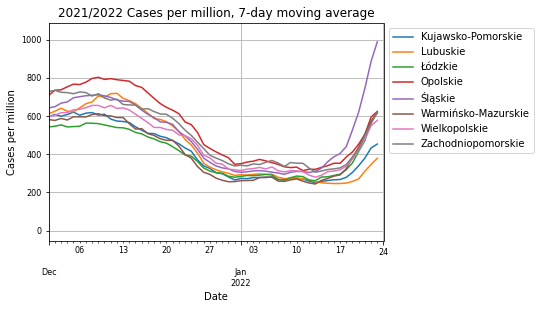

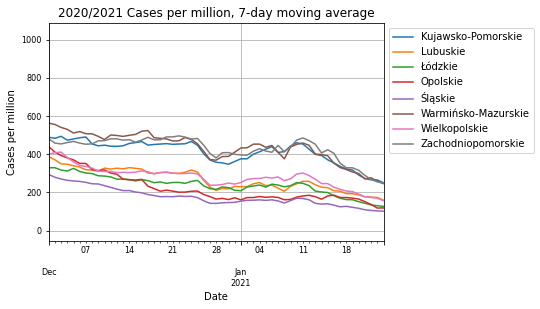

In [31]:
voivodships = [
    # 'Dolnośląskie',	# rośnie
    'Kujawsko-Pomorskie', # nie rośnie	
    # 'Lubelskie',	# rośnie
    'Lubuskie', 	# nie rośnie
    'Łódzkie', # nie rośnie
    # 'Małopolskie',	# rośnie
    # 'Mazowieckie',	# rośnie
    'Opolskie',	# nie rośnie
    # 'Podkarpackie',	# rośnie
    # 'Podlaskie',	# rośnie
    # 'Pomorskie', # rośnie mało
    'Śląskie',	#nie rośnie
    # 'Świętokrzyskie',	# rośnie mało
    'Warmińsko-Mazurskie',	# rośnie mało
    'Wielkopolskie',	# nie rośnie
    'Zachodniopomorskie' # rośnie mało
    ]


legendlabels_cases = voivodships
# legendlabels_cases = [voi + ', cases' for voi in voivodships]
# legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
# legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc_per1e6[voivodships].rolling(7).mean()
# dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2021/2022 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2020/2021 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2020,12,1), datetime.date(2021,1,24)), #(datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

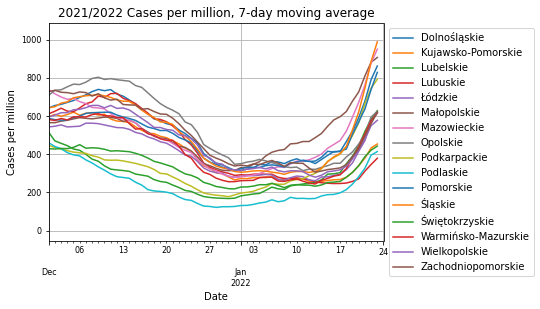

In [34]:
voivodships = [
    'Dolnośląskie',	# rośnie
    'Kujawsko-Pomorskie', # nie rośnie	
    'Lubelskie',	# rośnie
    'Lubuskie', 	# nie rośnie
    'Łódzkie', # nie rośnie
    'Małopolskie',	# rośnie
    'Mazowieckie',	# rośnie
    'Opolskie',	# nie rośnie
    'Podkarpackie',	# rośnie
    'Podlaskie',	# rośnie
    'Pomorskie', # rośnie mało
    'Śląskie',	#nie rośnie
    'Świętokrzyskie',	# rośnie mało
    'Warmińsko-Mazurskie',	# rośnie mało
    'Wielkopolskie',	# nie rośnie
    'Zachodniopomorskie' # rośnie mało
    ]


legendlabels_cases = voivodships
# legendlabels_cases = [voi + ', cases' for voi in voivodships]
# legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
# legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc_per1e6[voivodships].rolling(7).mean()
# dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2021/2022 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,2000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False #True
    )

plot(**plotopts);

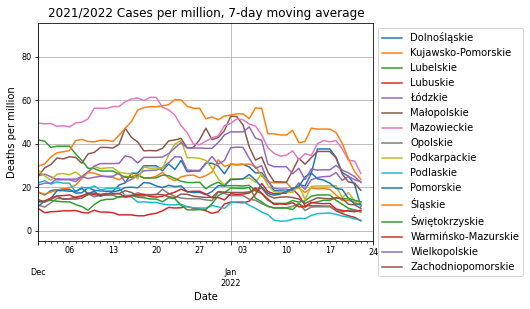

In [14]:
voivodships = [
    'Dolnośląskie',	# rośnie
    'Kujawsko-Pomorskie', # nie rośnie	
    'Lubelskie',	# rośnie
    'Lubuskie', 	# nie rośnie
    'Łódzkie', # nie rośnie
    'Małopolskie',	# rośnie
    'Mazowieckie',	# rośnie
    'Opolskie',	# nie rośnie
    'Podkarpackie',	# rośnie
    'Podlaskie',	# rośnie
    'Pomorskie', # rośnie mało
    'Śląskie',	#nie rośnie
    'Świętokrzyskie',	# rośnie mało
    'Warmińsko-Mazurskie',	# rośnie mało
    'Wielkopolskie',	# nie rośnie
    'Zachodniopomorskie' # rośnie mało
    ]


legendlabels = voivodships
# legendlabels_cases = [voi + ', cases' for voi in voivodships]
# legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
# legendlabels = legendlabels_cases + legendlabels_deaths


# dfq=dfc_per1e6[voivodships].rolling(7).mean()
dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        # dfq,
        dfp
     ],
    xlabel = 'Date',
    ylabel = 'Deaths per million',
    title = f'2021/2022 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,1000),
    legendlabels = legendlabels,
    logy = False
    )

plot(**plotopts);

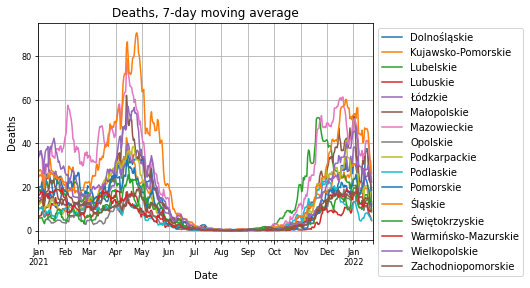

In [15]:
plotopts = dict_of(
    plotdfs=[dfp],
    xlabel = 'Date',
    ylabel = 'Deaths',
    title = f'Deaths, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date.today()),
    )

plot(**plotopts);

/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator

../share/helper_functions.py:331: UserWarning:

FixedFormatter should only be used together with FixedLocator



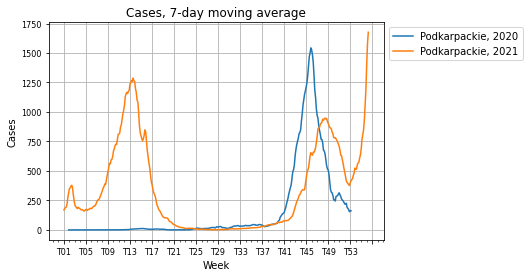

In [16]:
voivodships = ['Podkarpackie']
dfq=dfc[voivodships].rolling(7).mean()

dfq2020 =dfq[dfq.index <  pd.to_datetime(datetime.date(2021,1,1))].copy(deep = True)
dfq2021 = dfq[dfq.index >=  pd.to_datetime(datetime.date(2021,1,1))].copy(deep=True)

dfq2020['Week'] = dfq2020.index.strftime('T%V')
dfq2021['Week'] = dfq2021.index.strftime('T%V')


legendlabels_2020 = [voi + ', 2020' for voi in voivodships]
legendlabels_2021 = [voi + ', 2021' for voi in voivodships]
legendlabels = legendlabels_2020 + legendlabels_2021

plotopts = dict_of(
    plotdfs=[dfq2020, dfq2021],
    x = 'Week',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    legendlabels = legendlabels
    )

plot(**plotopts);

## Add new line for 2022!
